# Explore feature-to-feature relationship in Titanic

In [1]:
import pandas as pd
import seaborn as sns
from sklearn import datasets
import discover

In [2]:
# watermark is optional - it shows the versions of installed libraries
# so it is useful to confirm your library versions when you submit bug reports to projects
# install watermark using
# %install_ext https://raw.githubusercontent.com/rasbt/watermark/master/watermark.py
%load_ext watermark
# show a watermark for this environment
%watermark -d -m -v -p numpy,matplotlib,sklearn -g

2018-06-30 

CPython 3.6.5
IPython 6.4.0

numpy 1.14.5
matplotlib 2.2.2
sklearn 0.19.1

compiler   : GCC 4.8.2 20140120 (Red Hat 4.8.2-15)
system     : Linux
release    : 4.9.91-040991-generic
machine    : x86_64
processor  : x86_64
CPU cores  : 8
interpreter: 64bit
Git hash   : 1315881240f1c5ba03598294d00aa0adb6a3c398


# Load the Titanic dataset

In [3]:
df = pd.read_csv("titanic_train.csv")
df['SibSpParch'] = df.SibSp + df.Parch

cols = ['Pclass', 'SibSp', 'Parch', 'SibSpParch', 'Age', 'Fare', 'Sex', 'Embarked', 'Survived']
classifier_overrides = set(['Embarked', 'Survived', 'Sex'])

df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,SibSpParch
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,1
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,1
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,0


# Discover non-linear relationships

_Github note_ colours for `style` don't show up in Github, you'll have to grab a local copy of the Notebook.

* Fare predicts Embarked but Embarked poorly predict Fare
* Fare predicts Pclass but Pclass poorly predicts Fare
* SibSp and Parch both predict SibSpParch (the sum of both), SibSpParch predicts both of its components
* Sex (a text columns) predicts Survived

In [4]:
# pass in the subset of columns that we're interested in (we could analyse all columns if we wanted a bigger output)
df_results = discover.discover(df[cols], classifier_overrides)

In [5]:
df_results.pivot(index='target', columns='feature', values='score').fillna(1) \
.style.background_gradient(cmap="viridis", low=0.3, high=0.0, axis=1) \
.set_precision(2)

feature,Age,Embarked,Fare,Parch,Pclass,Sex,SibSp,SibSpParch,Survived
target,,,,,,,,,
Age,1,-0.011,-0.092,0.1,0.13,0.0026,0.1,0.044,-0.0022
Embarked,0.76,1,0.89,0.72,0.72,0.72,0.72,0.72,0.72
Fare,-0.075,0.07,1,0.038,0.36,0.023,0.026,0.059,0.044
Parch,0.049,0.0029,0.35,1,-0.013,0.049,0.17,0.66,0.0061
Pclass,0.0025,0.082,0.85,-0.021,1,-0.0059,0.028,0.046,0.087
Sex,0.56,0.65,0.62,0.65,0.65,1,0.65,0.68,0.79
SibSp,-0.014,-0.0084,0.61,0.19,-0.011,0.006,1,0.81,-0.011
SibSpParch,0.13,-0.0035,0.71,0.63,-0.013,0.032,0.79,1,-0.0056
Survived,0.57,0.64,0.7,0.61,0.68,0.79,0.63,0.67,1


## Check 2D relationships using a scatter plot

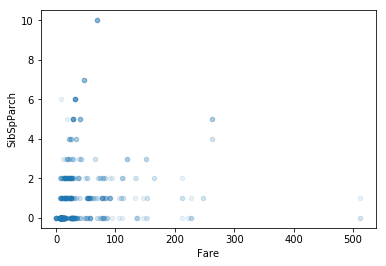

In [6]:
df.plot(kind="scatter", x="Fare", y="SibSpParch", alpha=0.1);

### Add a regression plot to show the direction of the relationship

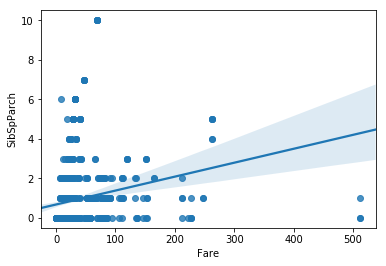

In [7]:
sns.regplot(data=df, x="Fare", y="SibSpParch");

## Scatter for Pclass (a categorical) is more sensibly represented using a box plot

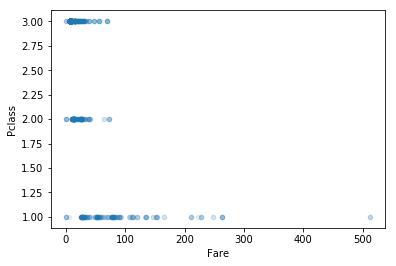

In [8]:
df.plot(kind="scatter", x="Fare", y="Pclass", alpha=0.1);

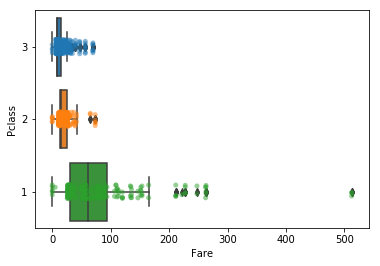

In [9]:
sns.boxplot(data=df, x="Fare", y="Pclass", orient="h", order=[3, 2, 1]);
sns.stripplot(data=df, x="Fare", y="Pclass", orient="h", order=[3, 2, 1], jitter=True, alpha=0.5);

## Plot Fare vs Embarked

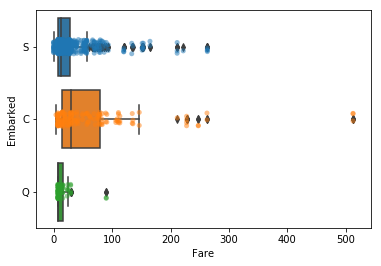

In [10]:
sns.boxplot(data=df, x="Fare", y="Embarked", orient="h");
sns.stripplot(data=df, x="Fare", y="Embarked", orient="h", jitter=True, alpha=0.5);